  ##     EXPLORATORY DATA ANALYSIS OF HISTORICAL GOLD PRICES
                      Time Series Analysis

The goal of this project is implement exploratory data analysis on gold prices on the international stock markets in order to provide draw insights for further studies. 

#### Import Libraries

In [50]:
import numpy as np
import pandas as pd

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

#### Load the data

In [52]:
# Gold dataset
gold = pd.read_csv('GoldFuturesHistoricalData2012-22.csv')

##### Check the structure of the dataset

In [53]:
# Data head
print("The first 10 rows of the data:")
gold.head(10)

The first 10 rows of the data:


,Date,Price,Open,High,Low,Vol.,Change %
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80",107.50K,0.01%
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20",105.99K,0.56%
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20",118.08K,-0.40%
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00",159.62K,0.74%
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55",NaN,0.30%
5,12/23/2022,"1,804.20","1,801.00","1,812.20","1,798.90",105.46K,0.50%
6,12/22/2022,"1,795.30","1,823.80","1,829.30","1,792.70",175.77K,-1.65%
7,12/21/2022,"1,825.40","1,827.90","1,833.80","1,821.30",110.18K,0.00%
8,12/20/2022,"1,825.40","1,796.80","1,832.40","1,793.70",197.50K,1.54%
9,12/19/2022,"1,797.70","1,801.60","1,808.60","1,793.20",86.09K,-0.14%


In [54]:
# Data tail

print("The last 10 rows of the data:")
gold.tail(10)

The last 10 rows of the data:


,Date,Price,Open,High,Low,Vol.,Change %
2831,01/16/2012,"1,655.60","1,635.80","1,668.00","1,631.90",193.66K,1.52%
2832,01/13/2012,"1,630.80","1,649.80","1,650.70","1,625.70",177.53K,-1.03%
2833,01/12/2012,"1,647.70","1,643.50","1,662.90","1,640.90",146.83K,0.49%
2834,01/11/2012,"1,639.60","1,632.40","1,648.00","1,630.80",144.55K,0.50%
2835,01/10/2012,"1,631.50","1,612.30","1,641.40","1,609.20",168.41K,1.46%
2836,01/09/2012,"1,608.10","1,617.70","1,624.60","1,605.70",134.39K,-0.54%
2837,01/06/2012,"1,616.80","1,622.40","1,632.30","1,609.00",155.21K,-0.20%
2838,01/05/2012,"1,620.10","1,614.40","1,626.80","1,597.70",176.47K,0.46%
2839,01/04/2012,"1,612.70","1,604.90","1,619.80","1,593.80",154.22K,0.76%
2840,01/03/2012,"1,600.50","1,571.00","1,608.70","1,566.80",112.94K,2.15%


In [55]:
# Check the shape of the data

print("The shape of the dataset or number of rows and columns:")
gold.shape

The shape of the dataset or number of rows and columns:


(2841, 7)

In [56]:
#Check details of the data

print("The details of the dataset: \n")
gold.info()

The details of the dataset: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2841 entries, 0 to 2840
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      2841 non-null   object
 1   Price     2841 non-null   object
 2   Open      2841 non-null   object
 3   High      2841 non-null   object
 4   Low       2841 non-null   object
 5   Vol.      2838 non-null   object
 6   Change %  2841 non-null   object
dtypes: object(7)
memory usage: 155.5+ KB


#### Description of the Dataset

#### The data set contains numerical data type with seven columns and 2841 rows. Its a Gold historical data from 01.01.2012 to 31.01.2022. Sources of the dataset is:
#### https://www.investing.com/commodities/gold-historical-data

##### Brief Description of the Dataset
1. Price: This column represents the closing price of gold on a particular day. It is the last price at which gold was traded for the day.

2. Open: This column represents the opening price of gold on a particular day. It is the first price at which gold was traded for the day.

3. High: This column represents the highest price of gold that was reached on a particular day.

4. Low: This column represents the lowest price of gold that was reached on a particular day.

5. Vol.: This column represents the volume of gold that was traded on a particular day. It is the total number of gold units that were traded on the stock market on that day.

6. Change %: This column represents the percentage change in the price of gold from the previous day's closing price. It shows the daily percentage change in the price of gold.

    The five columns provide important information on the daily performance of gold on the stock market. By analyzing these components, one can gain insights into the trends and movements of the gold market and make informed decisions regarding investments or trades involving gold. 
   The RangeIndex entry is 2841 with 7 columns. The DataFrame is of type object for all entries.

In [57]:
#Dropping Unsed columns

gold.drop(columns=['Vol.', 'Change %'], inplace=True)

In [58]:
gold.head()

,Date,Price,Open,High,Low
0,12/30/2022,"1,826.20","1,821.80","1,832.40","1,819.80"
1,12/29/2022,"1,826.00","1,812.30","1,827.30","1,811.20"
2,12/28/2022,"1,815.80","1,822.40","1,822.80","1,804.20"
3,12/27/2022,"1,823.10","1,808.20","1,841.90","1,808.00"
4,12/26/2022,"1,809.70","1,805.80","1,811.95","1,805.55"


### EXPLORATORY DATA ANALYSIS

Performing exploratory data analysis on the dataset. We will display information about the dataset, its statistics, check for missing values, stationarity and seasonality of the gold stock market. We will also plot the exchange rates to visualize the trend over the years.

#### Data Cleaning 

In [59]:
# Check for missing or NaN values
 
gold.isnull().sum()

Date     0
Price    0
Open     0
High     0
Low      0
dtype: int64

In [86]:
# Check for NaNs values again

gold.isnull().sum()

Price    0
Open     0
High     0
Low      0
Month    0
Year     0
dtype: int64

There are no missing and NAN values in the dataset. Good to go

In [62]:
print(gold[pd.isnull(gold).any(axis=1)])

Empty DataFrame
Columns: [Date, Price, Open, High, Low]
Index: []


In [63]:
# Remove commas from the columns

gold['Price'] = gold['Price'].str.replace(',', '').str.replace('$', '').astype(float)
gold['Open'] = gold['Open'].str.replace(',', '').str.replace('$', '').astype(float)
gold['High'] = gold['High'].str.replace(',', '').str.replace('$', '').astype(float)
gold['Low'] = gold['Low'].str.replace(',', '').str.replace('$', '').astype(float)

/var/folders/_6/fhcp4p4n4sd3n9hgq0hxgycc0000gn/T/ipykernel_4277/2983050602.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gold['Price'] = gold['Price'].str.replace(',', '').str.replace('$', '').astype(float)
/var/folders/_6/fhcp4p4n4sd3n9hgq0hxgycc0000gn/T/ipykernel_4277/2983050602.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gold['Open'] = gold['Open'].str.replace(',', '').str.replace('$', '').astype(float)
/var/folders/_6/fhcp4p4n4sd3n9hgq0hxgycc0000gn/T/ipykernel_4277/2983050602.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal st

In [64]:
# Convert all columns to a numeric format
 
gold['Price'] = pd.to_numeric(gold['Price'], errors='coerce')
gold['Open'] = pd.to_numeric(gold['Open'], errors='coerce')
gold['High'] = pd.to_numeric(gold['High'], errors='coerce')
gold['Low'] = pd.to_numeric(gold['Low'], errors='coerce')

In [65]:
# Convert the date column to DateTime type. This is very important in time series to able to 
#identify stationality in the market.

gold['Date'] = pd.to_datetime(gold['Date'])
gold['Month'] = gold['Date'].dt.month
gold['Year'] = gold['Date'].dt.year

In [66]:
# Print summary statistics 
gold.describe()

,Price,Open,High,Low,Month,Year
count,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000,2841.000000
mean,1461.080658,1461.414643,1471.455297,1450.418902,6.532911,2017.003872
std,254.995170,255.086924,257.284392,252.243147,3.431994,3.164668
min,1049.600000,1051.500000,1062.700000,1045.400000,1.000000,2012.000000
25%,1251.900000,1252.300000,1259.000000,1243.600000,4.000000,2014.000000
50%,1336.200000,1336.500000,1345.000000,1327.300000,7.000000,2017.000000
75%,1716.000000,1715.800000,1730.800000,1704.000000,10.000000,2020.000000
max,2069.400000,2076.400000,2089.200000,2049.000000,12.000000,2022.000000


***This summary describes the basic statistics of the gold futures historical dataset.***

1. count: the number of observations in each column (2841) 
2. mean: the average value of each column (Price: 1461.08, 
3. Open: 1461.41, Low: 1450.42) 
4. std: the standard deviation of each column (Price: 254.99, Open: 255.09, Low: 252.24) 
5. min: the minimum value of each column (Price: 1049.60, Open: 1051.50, Low: 1045.40) 
6. 25%: the value below which 25% of the observations fall (Price: 1251.90, Open: 1252.30, Low: 1243.60) 
7. 50%: the median or value below which 50% of the observations fall (Price: 1336.20, Open: 1336.50, Low: 1327.30) 
8. 75%: the value below which 75% of the observations fall (Price: 1716.00, Open: 1715.80, Low: 1704.00) 
9. max: the maximum value of each column (Price: 2069.40, Open: 2076.40, Low: 2049.00) 

This summary gives a quick overview of the distribution of the data and can be used to detect outliers, identify potential data quality issues, and help choose appropriate statistical methods for analysis.

### Data Visualisation 

In [67]:
# Creating pivot_table to resahpe the data. This will be used for heatmap Visualization 
# Creating a pivot table with years as index, months as columns, and gold prices as values.

pivot_gold = gold.pivot_table(index='Year', columns='Month', values='Price')
print(pivot_gold)

Month           1            2            3            4            5   \
Year                                                                     
2012   1660.880952  1746.228571  1676.318182  1651.720000  1587.121739   
2013   1672.140909  1627.000000  1591.665000  1485.045455  1414.882609   
2014   1243.981818  1301.905000  1336.528571  1298.747619  1286.754545   
2015   1255.061905  1224.640000  1177.813636  1199.877273  1197.595238   
2016   1096.830000  1201.919048  1245.531818  1243.842857  1258.586364   
2017   1195.390476  1236.370000  1231.252174  1271.136842  1246.230435   
2018   1333.113636  1332.680000  1325.600000  1338.376190  1304.204348   
2019   1292.800000  1323.905000  1300.571429  1289.266667  1284.960870   
2020   1562.072727  1599.885000  1598.586364  1707.733333  1722.595238   
2021   1865.155000  1807.030000  1719.986957  1760.909524  1853.480952   
2022   1816.809524  1861.410000  1952.317391  1937.545000  1847.313636   

Month           6            7       

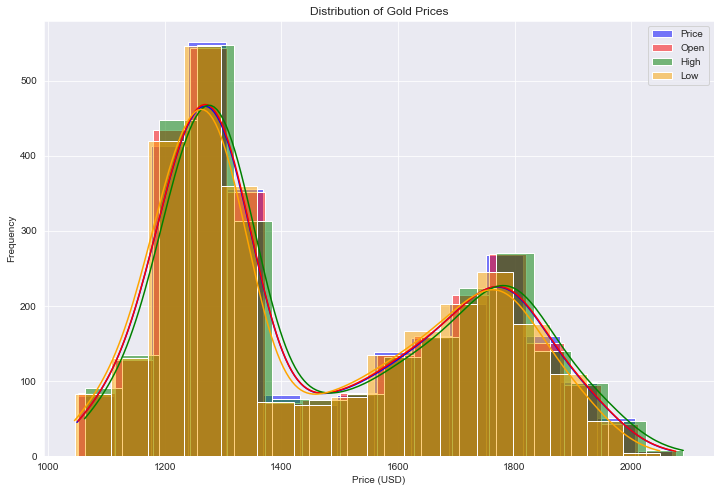

In [68]:
# Histogram of gold price

plt.figure(figsize=(12, 8))
sns.histplot(data=gold, x='Price', kde=True, label='Price', color='blue')
sns.histplot(data=gold, x='Open', kde=True, label='Open', color='red')
sns.histplot(data=gold, x='High', kde=True, label='High', color='green')
sns.histplot(data=gold, x='Low', kde=True, label='Low', color='orange')

plt.title('Distribution of Gold Prices')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


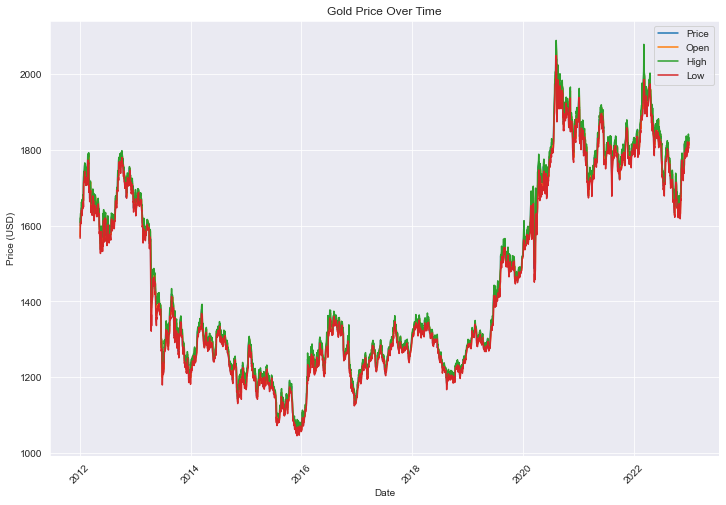

In [69]:
# Line plots of gold price over time

plt.figure(figsize=(12, 8))
plt.plot(gold['Date'], gold['Price'], label='Price')
plt.plot(gold['Date'], gold['Open'], label='Open')
plt.plot(gold['Date'], gold['High'], label='High')
plt.plot(gold['Date'], gold['Low'], label='Low')

plt.title('Gold Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.xticks(rotation=45)
plt.legend()
plt.show()

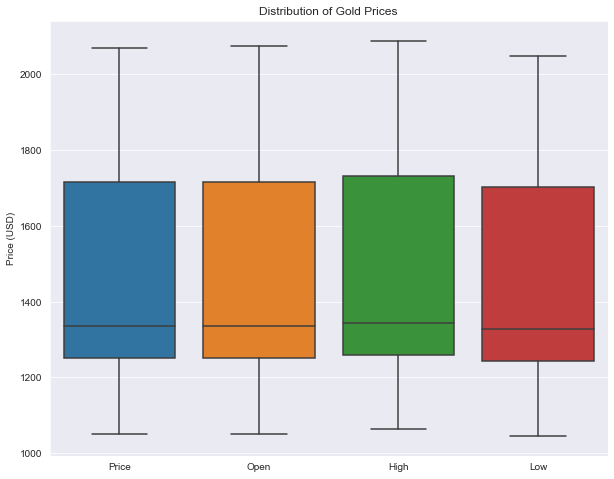

In [70]:
# Box plot
# Create a boxplot of the Price column

plt.figure(figsize=(10, 8))
sns.boxplot(data=gold[['Price', 'Open', 'High', 'Low']])
plt.title('Distribution of Gold Prices')
plt.ylabel('Price (USD)')
plt.show()

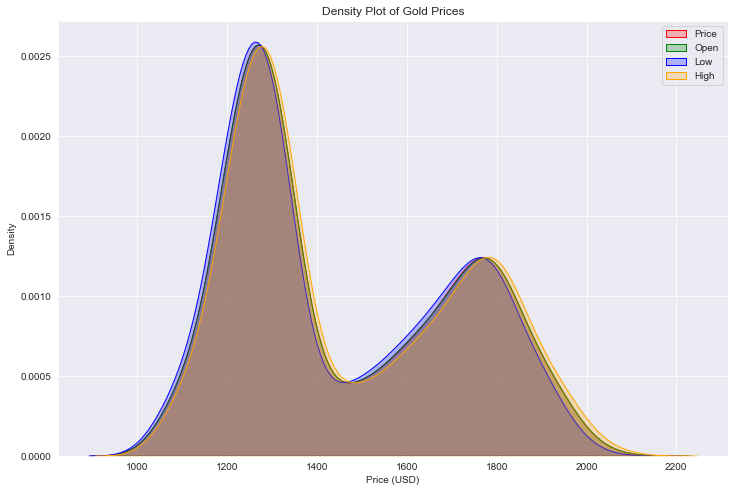

In [71]:
# Density plot
# Create a density plot of the Price column
plt.figure(figsize=(12, 8))
sns.kdeplot(data=gold, x='Price', shade=True, label='Price', color='red')
sns.kdeplot(data=gold, x='Open', shade=True, label='Open', color='green')
sns.kdeplot(data=gold, x='Low', shade=True, label='Low', color='blue')
sns.kdeplot(data=gold, x='High', shade=True, label='High', color='orange')

plt.title('Density Plot of Gold Prices')
plt.xlabel('Price (USD)')
plt.legend()
plt.show()

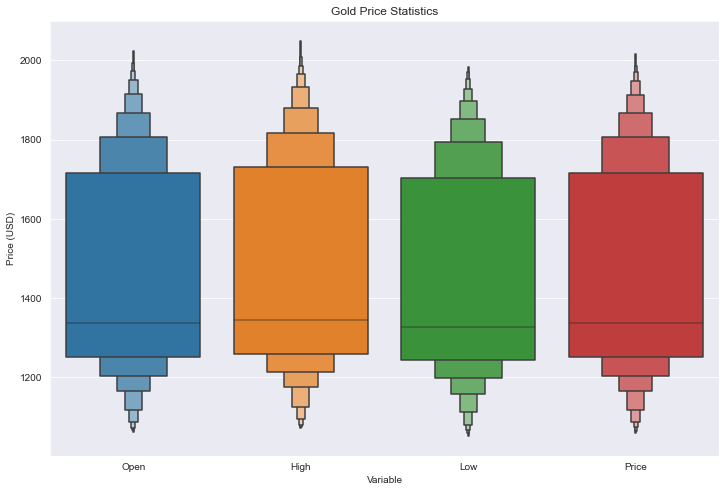

In [72]:
# Candlestick plot of open, high, low, and close prices

plt.figure(figsize=(12, 8))
sns.boxenplot(data=gold[['Open', 'High', 'Low', 'Price']], showfliers=False)
plt.title('Gold Price Statistics')
plt.xlabel('Variable')
plt.ylabel('Price (USD)')
plt.show()

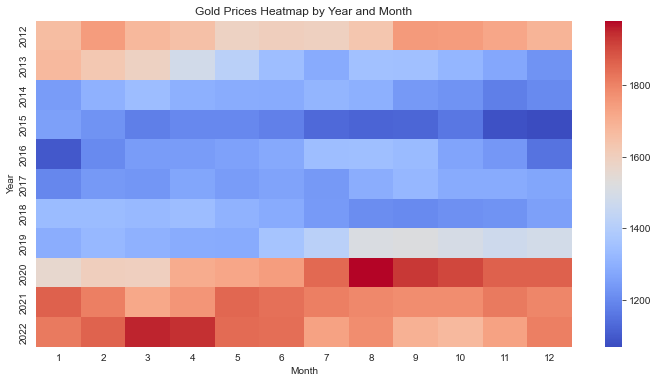

In [73]:
# Heat map of the Price column

plt.figure(figsize=(12,6))
pivot = pd.pivot_table(gold, values='Price', index='Year', columns='Month')
sns.heatmap(pivot, cmap='coolwarm')
plt.title('Gold Prices Heatmap by Year and Month')
plt.show()

In [74]:
# Set the date column as the index

gold.set_index('Date', inplace=True)

#### Minimum and Maximum prices for daily, weekly, and monthly.

We have already converted the date column to a datetime object and now have to set it as the index. This will be used to do resample method to calculate the maximum and minimum for each day, week, and month. 

An iteration will loops through each year in the dataset and calculates the maximum and minimum for each day, week, and month for that year. 

The output prints the year, maximum, and minimum value for each calculation period.

In [75]:
def calc_min_max_daily(dataframe, start_year, end_year):
    day_max = dataframe.resample('D').max()
    day_min = dataframe.resample('D').min()
    print("Maximum and minimum each day for the 10 year period: \n")
    for year in range(start_year, end_year+1):
        year_max = day_max.loc[f"{year}-01-01":f"{year}-12-31"]
        year_min = day_min.loc[f"{year}-01-01":f"{year}-12-31"]
        print(f"{year} - Price Maximum: {year_max['Price'].max():.2f}, Price Minimum: {year_min['Price'].min():.2f}, Open Maximum: {year_max['Open'].max():.2f}, Open Minimum: {year_min['Open'].min():.2f}, High Maximum: {year_max['High'].max():.2f}, High Minimum: {year_min['High'].min():.2f}, Low Maximum: {year_max['Low'].max():.2f}, Low Minimum: {year_min['Low'].min():.2f}")
calc_min_max_daily(gold, 2012, 2022)

Maximum and minimum each day for the 10 year period: 

2012 - Price Maximum: 1796.50, Price Minimum: 1536.60, Open Maximum: 1792.60, Open Minimum: 1538.60, High Maximum: 1798.10, High Minimum: 1552.20, Low Maximum: 1779.90, Low Minimum: 1526.70
2013 - Price Maximum: 1694.20, Price Minimum: 1193.60, Open Maximum: 1691.70, Open Minimum: 1188.80, High Maximum: 1697.80, High Minimum: 1205.10, Low Maximum: 1688.00, Low Minimum: 1179.40
2014 - Price Maximum: 1379.00, Price Minimum: 1142.60, Open Maximum: 1383.10, Open Minimum: 1140.80, High Maximum: 1392.60, High Minimum: 1149.00, Low Maximum: 1368.20, Low Minimum: 1130.40
2015 - Price Maximum: 1300.70, Price Minimum: 1049.60, Open Maximum: 1301.50, Open Minimum: 1051.50, High Maximum: 1307.80, High Minimum: 1062.70, Low Maximum: 1284.60, Low Minimum: 1045.40
2016 - Price Maximum: 1372.60, Price Minimum: 1073.60, Open Maximum: 1370.50, Open Minimum: 1061.50, High Maximum: 1377.50, High Minimum: 1081.50, Low Maximum: 1360.60, Low Minimum: 106

In [76]:
def calc_min_max_weekly(dataframe, start_year, end_year):
    week_max = dataframe.resample('W').max()
    week_min = dataframe.resample('W').min()
    print("Maximum and minimum each year: \n")
    for year in range(start_year, end_year+1):
        year_max = week_max.loc[f"{year}-01-01":f"{year}-12-31"]
        year_min = week_min.loc[f"{year}-01-01":f"{year}-12-31"]
        print(f"{year} - Price Maximum: {year_max['Price'].max():.2f}, Price Minimum: {year_min['Price'].min():.2f}, Open Maximum: {year_max['Open'].max():.2f}, Open Minimum: {year_min['Open'].min():.2f}, High Maximum: {year_max['High'].max():.2f}, High Minimum: {year_min['High'].min():.2f}, Low Maximum: {year_max['Low'].max():.2f}, Low Minimum: {year_min['Low'].min():.2f}")
calc_min_max_weekly(gold, 2012, 2022)

Maximum and minimum each year: 

2012 - Price Maximum: 1796.50, Price Minimum: 1536.60, Open Maximum: 1792.60, Open Minimum: 1538.60, High Maximum: 1798.10, High Minimum: 1552.20, Low Maximum: 1779.90, Low Minimum: 1526.70
2013 - Price Maximum: 1694.20, Price Minimum: 1193.60, Open Maximum: 1691.70, Open Minimum: 1188.80, High Maximum: 1697.80, High Minimum: 1205.10, Low Maximum: 1688.00, Low Minimum: 1179.40
2014 - Price Maximum: 1379.00, Price Minimum: 1142.60, Open Maximum: 1383.10, Open Minimum: 1140.80, High Maximum: 1392.60, High Minimum: 1149.00, Low Maximum: 1368.20, Low Minimum: 1130.40
2015 - Price Maximum: 1300.70, Price Minimum: 1049.60, Open Maximum: 1301.50, Open Minimum: 1051.50, High Maximum: 1307.80, High Minimum: 1064.50, Low Maximum: 1284.60, Low Minimum: 1045.40
2016 - Price Maximum: 1372.60, Price Minimum: 1059.80, Open Maximum: 1370.50, Open Minimum: 1060.60, High Maximum: 1377.50, High Minimum: 1062.70, Low Maximum: 1360.60, Low Minimum: 1056.50
2017 - Price Maxi

In [77]:
def calc_min_max_monthly(dataframe, start_year, end_year):
    month_max = dataframe.resample('M').max()
    month_min = dataframe.resample('M').min()
    print("Maximum and minimum each month for the 10 year period: \n")
    for year in range(start_year, end_year+1):
        year_max = month_max.loc[f"{year}-01-01":f"{year}-12-31"]
        year_min = month_min.loc[f"{year}-01-01":f"{year}-12-31"]
        print(f"{year} - Price Maximum: {year_max['Price'].max():.2f}, Price Minimum: {year_min['Price'].min():.2f}, Open Maximum: {year_max['Open'].max():.2f}, Open Minimum: {year_min['Open'].min():.2f}, High Maximum: {year_max['High'].max():.2f}, High Minimum: {year_min['High'].min():.2f}, Low Maximum: {year_max['Low'].max():.2f}, Low Minimum: {year_min['Low'].min():.2f}")
calc_min_max_monthly(gold, 2012, 2022)

Maximum and minimum each month for the 10 year period: 

2012 - Price Maximum: 1796.50, Price Minimum: 1536.60, Open Maximum: 1792.60, Open Minimum: 1538.60, High Maximum: 1798.10, High Minimum: 1552.20, Low Maximum: 1779.90, Low Minimum: 1526.70
2013 - Price Maximum: 1694.20, Price Minimum: 1193.60, Open Maximum: 1691.70, Open Minimum: 1188.80, High Maximum: 1697.80, High Minimum: 1205.10, Low Maximum: 1688.00, Low Minimum: 1179.40
2014 - Price Maximum: 1379.00, Price Minimum: 1142.60, Open Maximum: 1383.10, Open Minimum: 1140.80, High Maximum: 1392.60, High Minimum: 1149.00, Low Maximum: 1368.20, Low Minimum: 1130.40
2015 - Price Maximum: 1300.70, Price Minimum: 1049.60, Open Maximum: 1301.50, Open Minimum: 1051.50, High Maximum: 1307.80, High Minimum: 1062.70, Low Maximum: 1284.60, Low Minimum: 1045.40
2016 - Price Maximum: 1372.60, Price Minimum: 1073.60, Open Maximum: 1370.50, Open Minimum: 1061.50, High Maximum: 1377.50, High Minimum: 1081.50, Low Maximum: 1360.60, Low Minimum: 1

In [78]:
def calc_min_max_yearly(dataframe, start_year, end_year):
    year_max = dataframe.resample('Y').max()
    year_min = dataframe.resample('Y').min()
    print("Maximum and minimum each year for the 10 year period: \n")
    for year in range(start_year, end_year+1):
        year_max = year_max.loc[f"{year}-01-01":f"{year}-12-31"]
        year_min = year_min.loc[f"{year}-01-01":f"{year}-12-31"]
        print(f"{year} - Price Maximum: {year_max['Price'].max():.2f}, Price Minimum: {year_min['Price'].min():.2f}, Open Maximum: {year_max['Open'].max():.2f}, Open Minimum: {year_min['Open'].min():.2f}, High Maximum: {year_max['High'].max():.2f}, High Minimum: {year_min['High'].min():.2f}, Low Maximum: {year_max['Low'].max():.2f}, Low Minimum: {year_min['Low'].min():.2f}")
calc_min_max_yearly(gold, 2012, 2022)


Maximum and minimum each year for the 10 year period: 

2012 - Price Maximum: 1796.50, Price Minimum: 1536.60, Open Maximum: 1792.60, Open Minimum: 1538.60, High Maximum: 1798.10, High Minimum: 1552.20, Low Maximum: 1779.90, Low Minimum: 1526.70
2013 - Price Maximum: nan, Price Minimum: nan, Open Maximum: nan, Open Minimum: nan, High Maximum: nan, High Minimum: nan, Low Maximum: nan, Low Minimum: nan
2014 - Price Maximum: nan, Price Minimum: nan, Open Maximum: nan, Open Minimum: nan, High Maximum: nan, High Minimum: nan, Low Maximum: nan, Low Minimum: nan
2015 - Price Maximum: nan, Price Minimum: nan, Open Maximum: nan, Open Minimum: nan, High Maximum: nan, High Minimum: nan, Low Maximum: nan, Low Minimum: nan
2016 - Price Maximum: nan, Price Minimum: nan, Open Maximum: nan, Open Minimum: nan, High Maximum: nan, High Minimum: nan, Low Maximum: nan, Low Minimum: nan
2017 - Price Maximum: nan, Price Minimum: nan, Open Maximum: nan, Open Minimum: nan, High Maximum: nan, High Minimum: nan,

##### Outliers Identification
I will use the Z-score method: This method involves calculating the z-score for each data point, which represents how many standard deviations away it is from the mean. Data points with a z-score greater than a certain threshold can be considered as outliers.

In [79]:
# Calculate the z-score for each data point
z_scores = np.abs((gold['Price'] - gold['Price'].mean()) / gold['Price'].std())

threshold = 3
outliers = gold[z_scores > threshold]
print(outliers)

Empty DataFrame
Columns: [Price, Open, High, Low, Month, Year]
Index: []


**Observation**

No Outliers given threshold = 3

I set a threshold of 3 against the z-score and no outliers were identified. Threshold can be manipulated to any real number.

### Stationarity

Stationarity means that the statistical properties of a time series (or rather the process generating it) do not change over time. Stationarity is important because many useful analytical tools and statistical tests and models rely on it (Palachy, 2019).


To test for stationarity in a time series, one commonly used method is the Augmented Dickey-Fuller (ADF) test, which is a statistical hypothesis test that tests whether a time series is stationary or not. The null hypothesis of the ADF test is that the time series is non-stationary, and the alternative hypothesis is that the time series is stationary.
The ADF test checks for the presence of a unit root in the time series data. 

If the p-value is less than the significance level (0.05), we can reject the null hypothesis and conclude that the time series is stationary. 

If the p-value is greater than the significance level, we fail to reject the null hypothesis and conclude that the time series is non-stationary.

In [80]:
def generate_timeseries(start_date, end_date, freq):
    """
    Generates a pandas DataFrame with random numbers as the timeseries.
    """
    np.random.seed(0)
    dat = pd.date_range(start=start_date, end=end_date, freq=freq)
    timeseries = pd.DataFrame(np.random.randn(len(dat)), index=dat, columns=['value'])
    return timeseries

In [81]:
# Checking for stationarity using the Augmented Dickey-Fuller Test
def test_stationarity(gold):
    """
    Performs the Augmented Dickey-Fuller Test to check for stationarity in the gold dataset.
    """
    result = adfuller(gold['Price'])
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    if result[0] < result[4]['5%']:
        print("The time series is stationary")
    else:
        print("The time series is not stationary")

In [82]:
# Perform Augmented Dickey-Fuller (ADF) test on 'Price' column

print('Augmented Dickey-Fuller Test Results for Price:')
adf_test = adfuller(gold['Price'], autolag='AIC')

adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])

for key, value in adf_test[4].items():
    adf_output[f'Critical Value ({key})'] = value
    
print(adf_output)


Augmented Dickey-Fuller Test Results for Price:
Test Statistic                   -1.667584
p-value                           0.447887
Lags Used                         7.000000
Number of Observations Used    2833.000000
Critical Value (1%)              -3.432660
Critical Value (5%)              -2.862561
Critical Value (10%)             -2.567313
dtype: float64


In [83]:
# Perform Augmented Dickey-Fuller (ADF) test on 'Open' column

print('Augmented Dickey-Fuller Test Results for Price:')
adf_test = adfuller(gold['Open'], autolag='AIC')

adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])

for key, value in adf_test[4].items():
    adf_output[f'Critical Value ({key})'] = value
    
print(adf_output)

Augmented Dickey-Fuller Test Results for Price:
Test Statistic                   -1.817473
p-value                           0.371822
Lags Used                         0.000000
Number of Observations Used    2840.000000
Critical Value (1%)              -3.432655
Critical Value (5%)              -2.862558
Critical Value (10%)             -2.567312
dtype: float64


In [84]:
# Perform Augmented Dickey-Fuller (ADF) test on 'High' column

print('Augmented Dickey-Fuller Test Results for Price:')
adf_test = adfuller(gold['High'], autolag='AIC')

adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])

for key, value in adf_test[4].items():
    adf_output[f'Critical Value ({key})'] = value
    
print(adf_output)

Augmented Dickey-Fuller Test Results for Price:
Test Statistic                   -1.631989
p-value                           0.466450
Lags Used                        10.000000
Number of Observations Used    2830.000000
Critical Value (1%)              -3.432663
Critical Value (5%)              -2.862562
Critical Value (10%)             -2.567314
dtype: float64


In [85]:
# Perform Augmented Dickey-Fuller (ADF) test on 'Low' column

print('Augmented Dickey-Fuller Test Results for Price:')
adf_test = adfuller(gold['Low'], autolag='AIC')

adf_output = pd.Series(adf_test[0:4], index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used'])

for key, value in adf_test[4].items():
    adf_output[f'Critical Value ({key})'] = value
    
print(adf_output)

Augmented Dickey-Fuller Test Results for Price:
Test Statistic                   -1.858503
p-value                           0.351827
Lags Used                         1.000000
Number of Observations Used    2839.000000
Critical Value (1%)              -3.432655
Critical Value (5%)              -2.862559
Critical Value (10%)             -2.567312
dtype: float64


##### Stationarity Explanation 

The result shows the Augmented Dickey-Fuller (ADF) test for the 'Price', 'Open', 'High' and 'Low' columns. It shows the test statistic (-1.858503), p-value (0.351827), number of lags (1.00000), number of observations (2839) used, and critical values at different significance levels of 1%, 5%, 10% with values -3.432655, 2.862559, -2.567312 respectfully  .

The p-value of 0.351827 is greater than 0.05, indicating that we cannot reject the null hypothesis that the columns are non-stationary. The p-value is greater than the significance level, hence, we fail to reject the null hypothesis and conclude that the time series is non-stationary.

We need to make them stationary using techniques such as differencing, detrending, or taking the logarithm of the data before building predictive models. However, the scope is this assignment do not include model prediction so we will end here.


##### References 

Investing.com (no date), 'Gold Futures' Available: https://www.investing.com/commodities/gold-historical-data (Accessed at: 14 March 2023)

Palachy S. (2019), 'Detecting Stationarity in time series data', KDnuggets, August 2019. Available at: https://www.kdnuggets.com/2019/08/stationarity-time-series-data.html
(Accessed: 10 March 2023)

                                                            @arbroni_